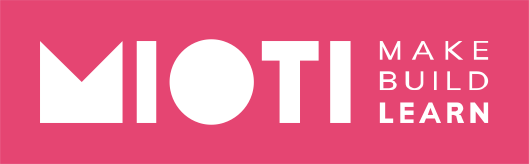
 <center style="color:#888">Estadística para Data Science<br/>Asignatura Estadística</center>

# EJEMPLOS REGRESIÓN

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.linear_model import LinearRegression

In [2]:
dataframe = pd.read_csv('processDf.csv',index_col=0) 
dataframe.head()

,Image Number,Total Size (mb)
Time Lapse (hr),,
0.40,50.0,290.0
0.79,100.0,579.0
1.22,150.0,869.0
1.77,200.0,1162.0
2.18,250.0,1460.0


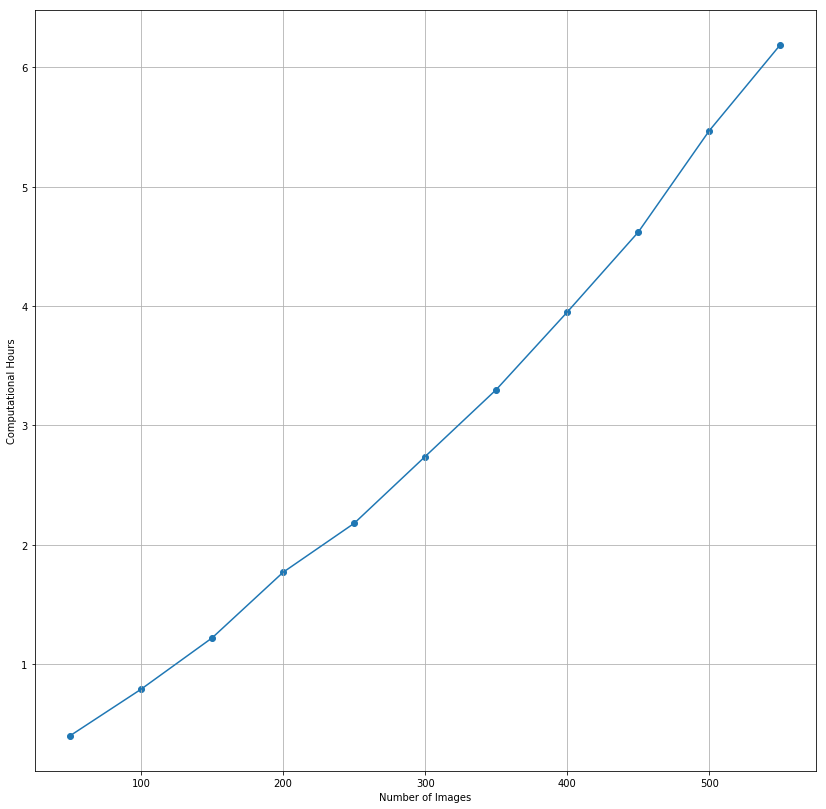

In [3]:
fig = plt.figure(figsize=(14,14)) 
plt.scatter(dataframe['Image Number'],dataframe.index)
plt.plot(dataframe['Image Number'],dataframe.index)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.grid()

In [4]:
nImages = dataframe.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Hours = dataframe.index.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(nImages, Hours)  # perform linear regression
Hours_pred = linear_regressor.predict(nImages) # make predictions
Hours_pred 

array([[0.08681818],
       [0.66272727],
       [1.23863636],
       [1.81454545],
       [2.39045455],
       [2.96636364],
       [3.54227273],
       [4.11818182],
       [4.69409091],
       [5.27      ],
       [5.84590909]])

In [5]:
#equation definition y = mx +c
#in this case Hours = m * nImages + c
m = round(linear_regressor.coef_[0][0],4)
c = round(linear_regressor.intercept_[0],2)
label = r'$Hours = %0.2f·ImagesNumber %+0.2f   $'%(m,c)
print(label)

$Hours = 0.01·ImagesNumber -0.49   $


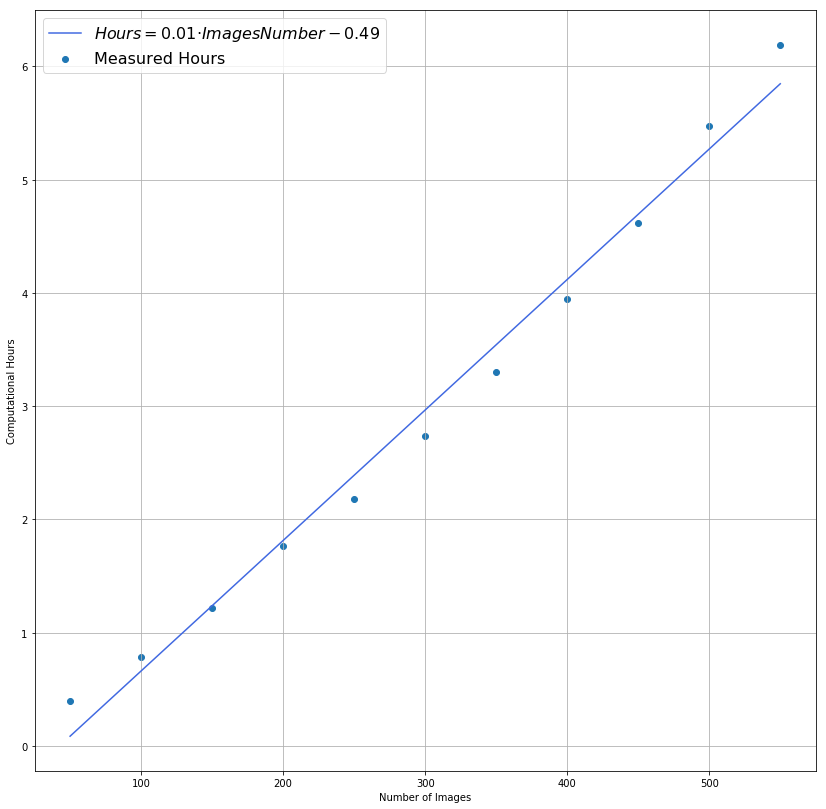

In [6]:
fig = plt.figure(figsize=(14,14)) 
#plt.scatter(dataframe['Total Size (mb)'],dataframe.index)
plt.scatter(dataframe['Image Number'],dataframe.index,label='Measured Hours')
plt.plot(nImages, Hours_pred, color='royalblue',label=label)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend(prop={'size': 16})
plt.grid()

In [7]:
def regressionOnItem(itemBegin,itemEnd,color):
    nImagesTot = dataframe['Image Number'].values.reshape(-1, 1)  
    HoursTot = dataframe.index.values.reshape(-1, 1)  
    nImagesSeg = dataframe['Image Number'].iloc[itemBegin:itemEnd].values.reshape(-1, 1)  
    HoursSeg = dataframe.index.values[itemBegin:itemEnd].reshape(-1, 1)  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(nImagesSeg, HoursSeg)  # perform linear regression
    Hours_pred = linear_regressor.predict(nImagesSeg) # make predictions
    m = linear_regressor.coef_[0][0]
    c = linear_regressor.intercept_[0]
    label = r'$Hours = %0.4f·numberImages %+0.4f   $'%(m,c)
    print(label)
    
    plt.plot(nImagesSeg, Hours_pred, color=color,label=label, )


$Hours = 0.0115·numberImages -0.4891   $
$Hours = 0.0091·numberImages -0.0900   $
$Hours = 0.0110·numberImages -0.5000   $
$Hours = 0.0151·numberImages -2.1340   $


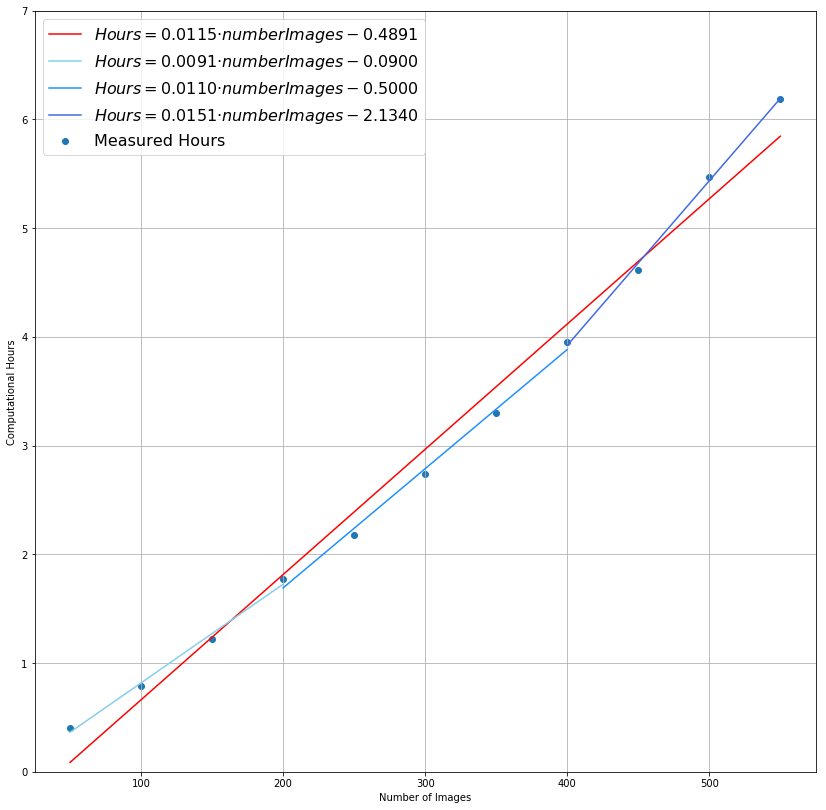

In [8]:
fig = plt.figure(figsize=(14,14)) 
plt.scatter(dataframe['Image Number'],dataframe.index,label='Measured Hours')
regressionOnItem(0,11,'red')
regressionOnItem(0,4,'skyblue')
regressionOnItem(3,8,'dodgerblue')
regressionOnItem(7,11,'royalblue')

plt.ylim(0,7)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend(prop={'size': 16})
plt.grid()

## Ejemplo 2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


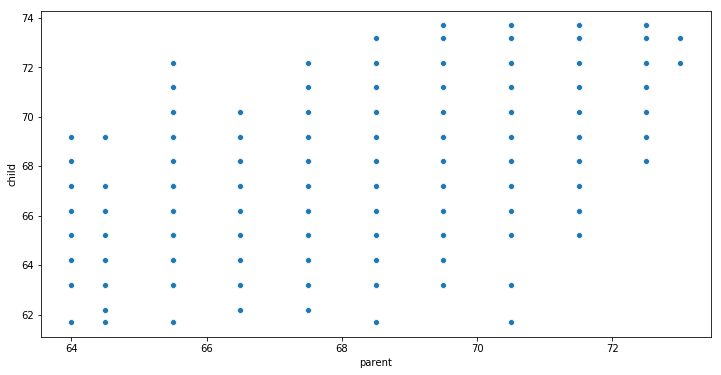

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

data = 'https://vincentarelbundock.github.io/Rdatasets/csv/HistData/Galton.csv'
df = pd.read_csv(data, index_col=0)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='parent', y='child', data=df)

Text(64,73,'r=0.46, p=0.0')

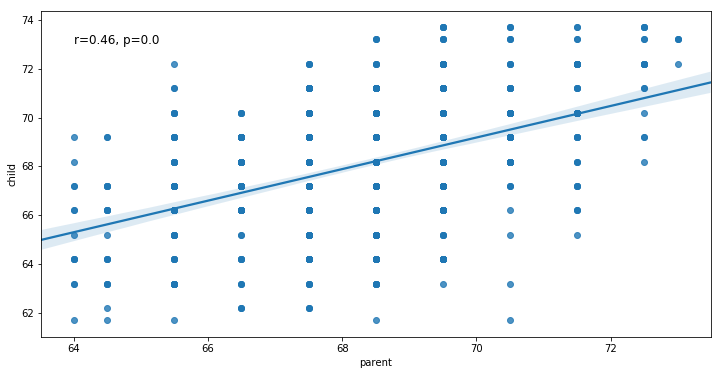

In [10]:
from scipy.stats import pearsonr

corr = pearsonr(df['parent'], df['child'])
corr = [np.round(c, 2) for c in corr]



text = 'r=%s, p=%s' % (corr[0], corr[1])

plt.figure(figsize=(12, 6))
ax = sns.regplot(x='parent', y='child', data=df)
ax.text(64, 73, text, fontsize=12)

## Ejemplo 3

In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [12]:
dataframe = pd.read_csv("usuarios_win_mac_linusuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [13]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [14]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualicemos los datos:

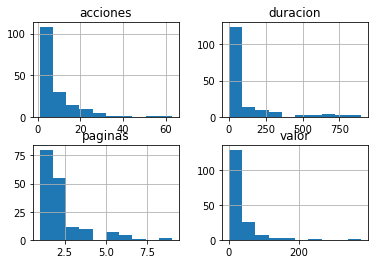

In [15]:
dataframe.drop(['clase'],1).hist()
plt.show()

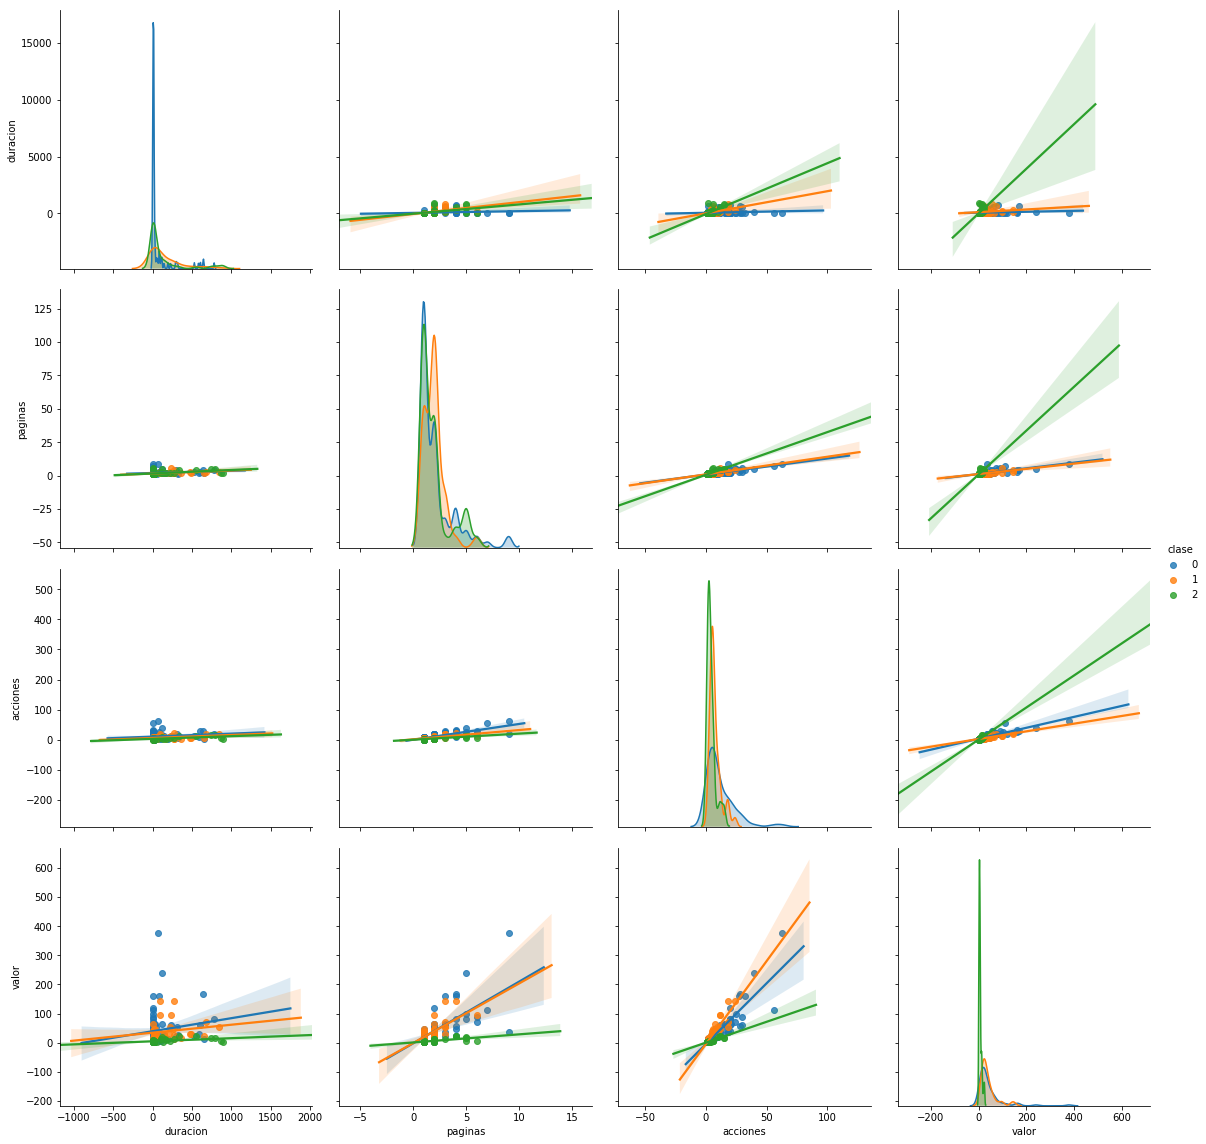

In [16]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [17]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [18]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions = model.predict(X)
print(predictions)
# print(predictions)[0:4]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
model.score(X,y)

0.7823529411764706

### Adicional: Validación del Modelo

In [21]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [22]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.728571 (0.094186)


In [23]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


### Reporte de Resultados

In [24]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [25]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



### Clasificación de nuevos registros

In [26]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])